# 주식 자산 평가

## 주식 평가
* 1. 소유 주식 종가 정보 가져온다.
* 2. 전고점 대비 현재 종가의 변동 비율을 구한다.
* 3. 시각화한다.

In [1]:
import FinanceDataReader as fdr
import pandas as pd
from tqdm import tqdm

## 여러 종목 불러와 df 만들기

In [2]:
# AAPL : apple
# MSFT : microsoft
# TSLA : tesla
# NVDA : nvidia
# IVV : iShares Core S&P 500 ETF
# SPYG : SPDR® Portfolio S&P 500 Growth ETF
# VYM : Vanguard High Dividend Yield Index Fund ETF Shares

# 셀트리온 : '068270'
# 삼성전자 : '005930'
# 인선이엔티 : '060150'
# 스튜디오드래곤 : '253450'
# KT : '030200'

In [3]:
start_date = '2020-1'

### 해외 주식

In [4]:
us_stock_dic = {'AAPL' : 'apple', 'MSFT' : 'microsoft', 'TSLA' : 'tesla', 'NVDA' : 'nvidia',
'IVV' : 'IVV', 'SPYG' : 'SPYG', 'VYM' : 'VYM'}

In [5]:
us_stock_df = pd.DataFrame()
for code in tqdm( us_stock_dic.keys() ):
    name = us_stock_dic[code]
    tmp = fdr.DataReader(code, start_date)
    tmp = tmp.rename(columns={'Close':name})
    us_stock_df = pd.concat([us_stock_df, tmp[name]], axis=1)
us_stock_df = us_stock_df.reset_index()
us_stock_df.info()

100%|██████████| 7/7 [00:09<00:00,  1.39s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      513 non-null    datetime64[ns]
 1   apple      513 non-null    float64       
 2   microsoft  513 non-null    float64       
 3   tesla      513 non-null    float64       
 4   nvidia     513 non-null    float64       
 5   IVV        513 non-null    float64       
 6   SPYG       513 non-null    float64       
 7   VYM        513 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 32.2 KB


### 국내 주식

In [6]:
kr_stock_dic = {'068270':'셀트리온', '005930':'삼성전자', '060150':'인선이엔티', '253450':'스튜디오드래곤', '030200':'KT'}

In [7]:
kr_stock_df = pd.DataFrame()
for code in tqdm( kr_stock_dic.keys() ):
    name = kr_stock_dic[code]
    tmp = fdr.DataReader(code, start_date)
    tmp = tmp.rename(columns={'Close':name})
    kr_stock_df = pd.concat([kr_stock_df, tmp[name]], axis=1)
kr_stock_df = kr_stock_df.reset_index()
kr_stock_df.info()

100%|██████████| 5/5 [00:00<00:00,  5.21it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    504 non-null    datetime64[ns]
 1   셀트리온     504 non-null    int64         
 2   삼성전자     504 non-null    int64         
 3   인선이엔티    504 non-null    int64         
 4   스튜디오드래곤  504 non-null    int64         
 5   KT       504 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 23.8 KB


## 종가 시각화

In [8]:
import matplotlib.pyplot as plt

In [9]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [10]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

### 해외 주식 종가 시각화

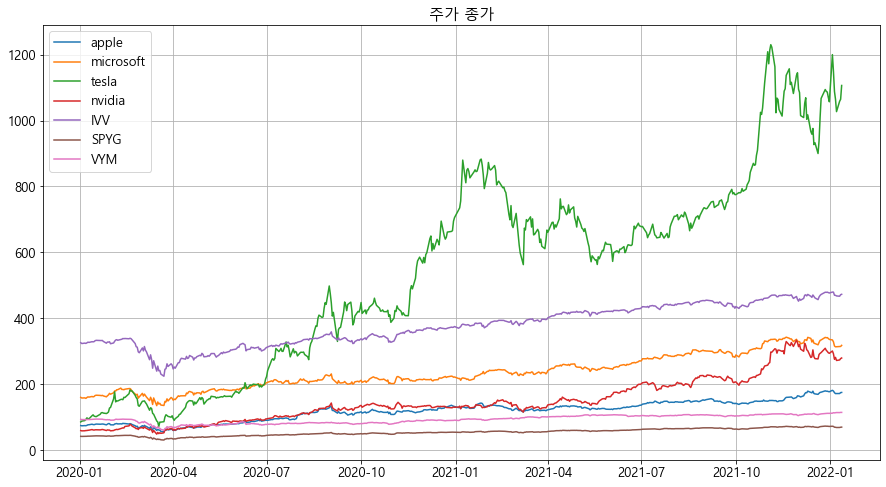

In [11]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('주가 종가', fontdict={'size':15})
for i in range(us_stock_df.shape[1]-1):
    plt.plot(us_stock_df['index'], us_stock_df.iloc[:,i+1], label=us_stock_df.columns[i+1])
plt.legend(fontsize=13)

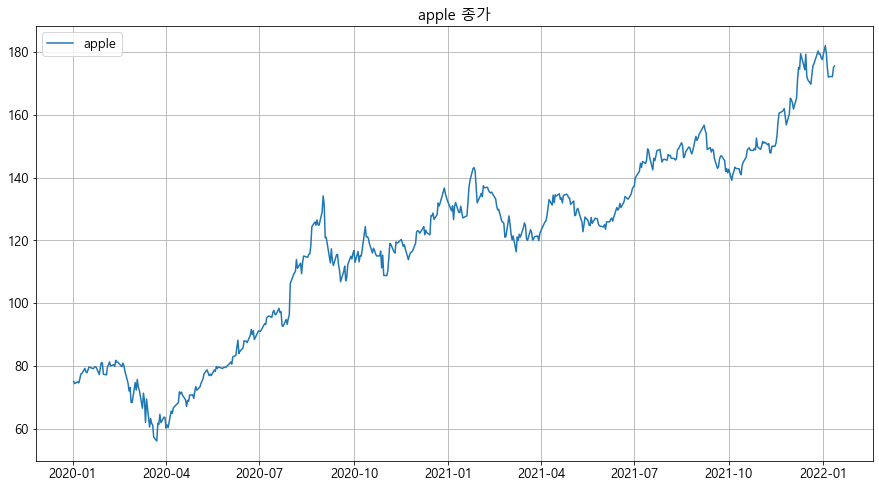

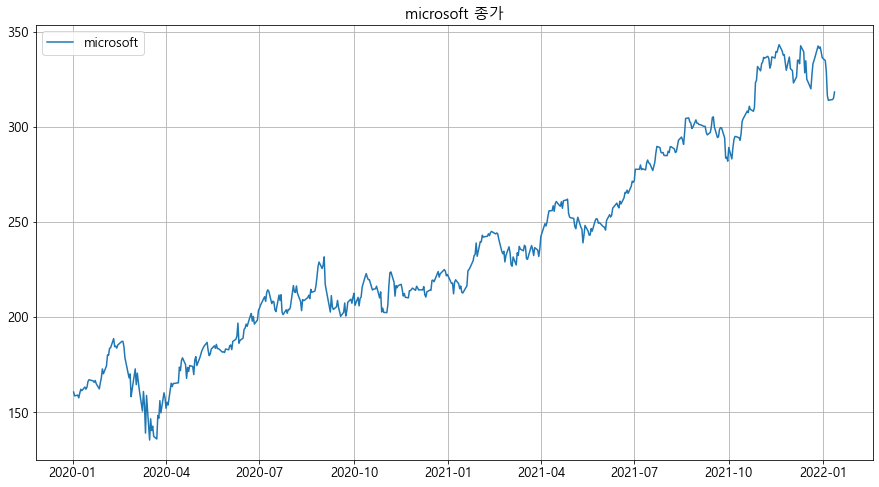

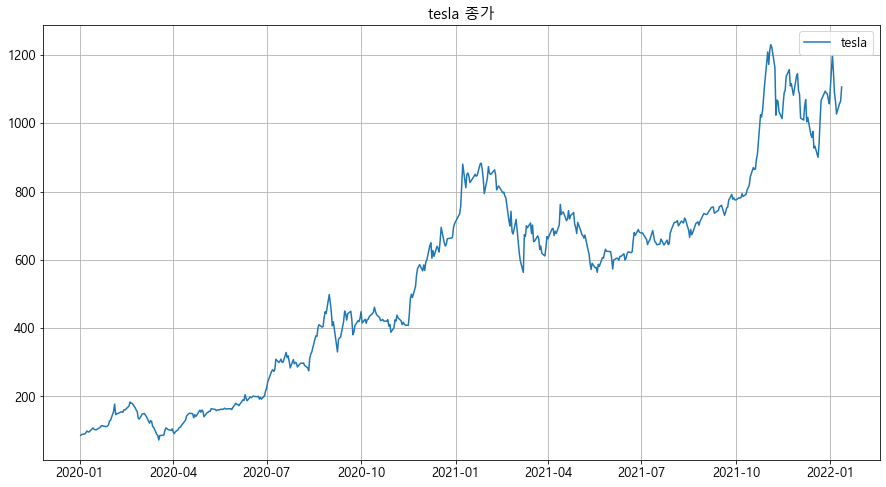

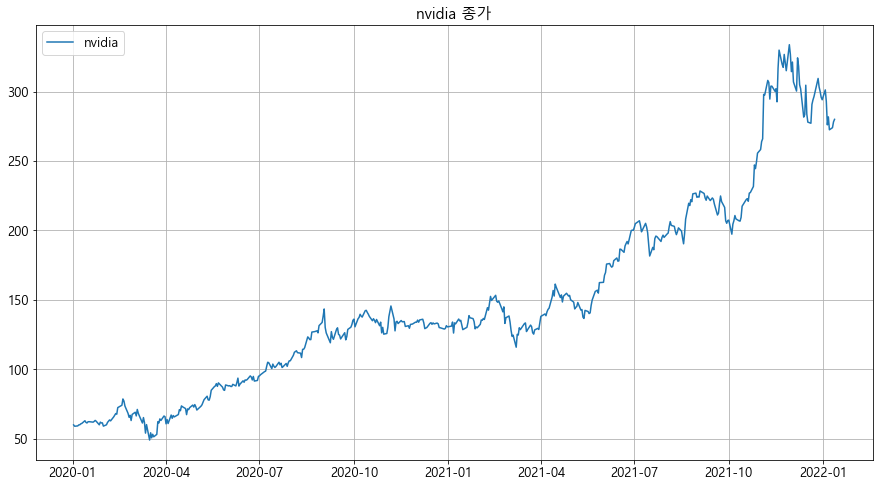

In [12]:
for i in range(1, us_stock_df.shape[1] // 2 + 1):
    plt.figure(figsize=(15,8))
    plt.grid(True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    stock_name = us_stock_df.columns[i]
    plt.title(f'{stock_name} 종가', fontdict={'size':15})
    plt.plot(us_stock_df['index'], us_stock_df.iloc[:,i], label=us_stock_df.columns[i])
    plt.legend(fontsize=13)

### 국내 주식 종가 시각화

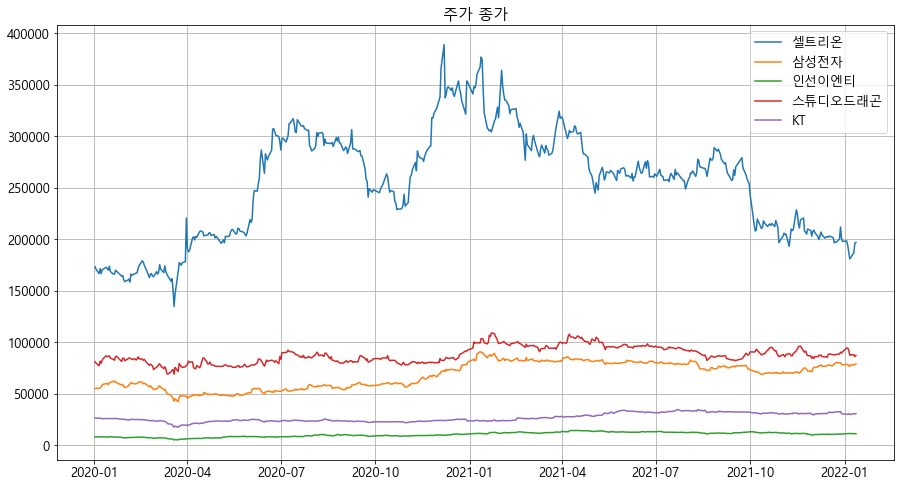

In [13]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('주가 종가', fontdict={'size':15})
for i in range(kr_stock_df.shape[1]-1):
    plt.plot(kr_stock_df['index'], kr_stock_df.iloc[:,i+1], label=kr_stock_df.columns[i+1])
plt.legend(fontsize=13)

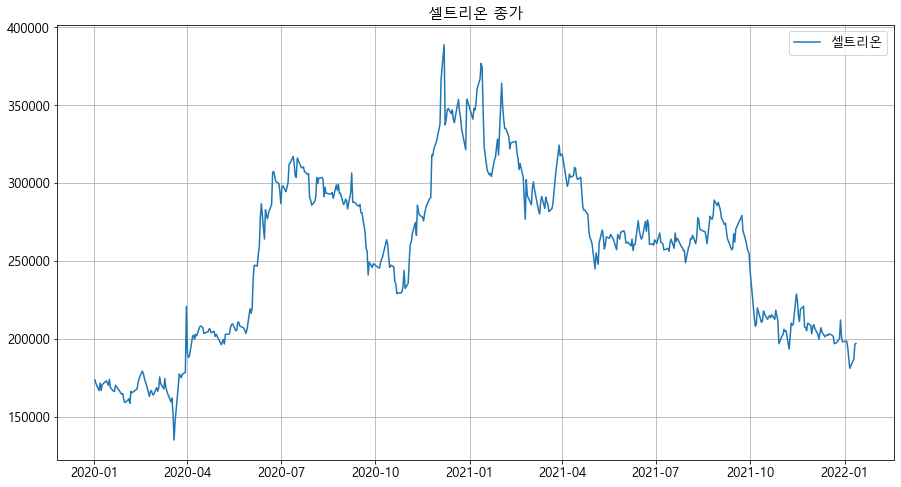

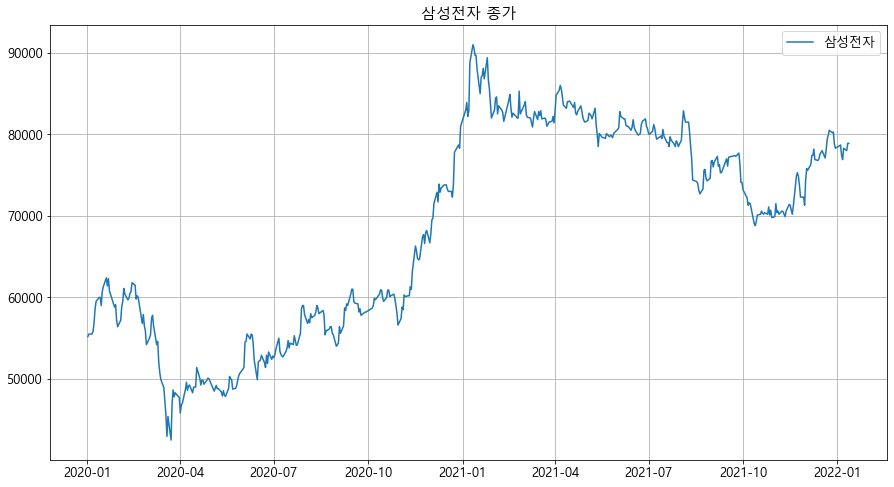

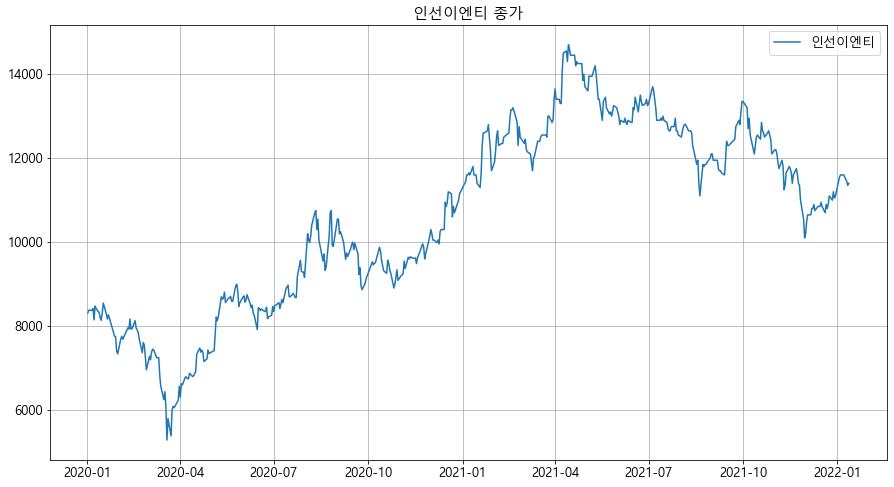

In [14]:
for i in range(1, kr_stock_df.shape[1] // 2 + 1):
    plt.figure(figsize=(15,8))
    plt.grid(True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    stock_name = kr_stock_df.columns[i]
    plt.title(f'{stock_name} 종가', fontdict={'size':15})
    plt.plot(kr_stock_df['index'], kr_stock_df.iloc[:,i], label=kr_stock_df.columns[i])
    plt.legend(fontsize=13)

## 전고점 대비 변화 비율 시각화

### 해외 주식 비율 계산

In [15]:
us_stock_df.columns[1:]

Index(['apple', 'microsoft', 'tesla', 'nvidia', 'IVV', 'SPYG', 'VYM'], dtype='object')

In [16]:
for stock_name in us_stock_df.columns[1:]:
    top_close = us_stock_df[stock_name].max()
    col_name = stock_name + '_rate'
    us_stock_df[col_name] = ( (us_stock_df[stock_name] - top_close) / top_close ) * 100    

In [17]:
us_stock_df.head()

,index,apple,microsoft,tesla,nvidia,IVV,SPYG,VYM,apple_rate,microsoft_rate,tesla_rate,nvidia_rate,IVV_rate,SPYG_rate,VYM_rate
0,2020-01-02,75.09,160.62,86.05,59.98,326.32,42.50,93.97,-58.744025,-53.187025,-93.003553,-82.029003,-31.993998,-42.161132,-18.294061
1,2020-01-03,74.36,158.62,88.60,59.02,323.81,42.19,93.23,-59.145102,-53.769928,-92.796221,-82.316635,-32.517089,-42.583016,-18.937484
2,2020-01-06,74.95,159.03,90.31,59.27,325.09,42.39,93.28,-58.820944,-53.650433,-92.657186,-82.241731,-32.250333,-42.310833,-18.894009
3,2020-01-07,74.60,157.58,93.81,59.98,324.20,42.35,92.90,-59.013241,-54.073038,-92.372613,-82.029003,-32.435812,-42.365269,-19.224415
4,2020-01-08,75.80,160.09,98.43,60.09,325.85,42.62,93.14,-58.353937,-53.341494,-91.996975,-81.996045,-32.091947,-41.997823,-19.015738


In [18]:
us_stock_df.shape

(513, 15)

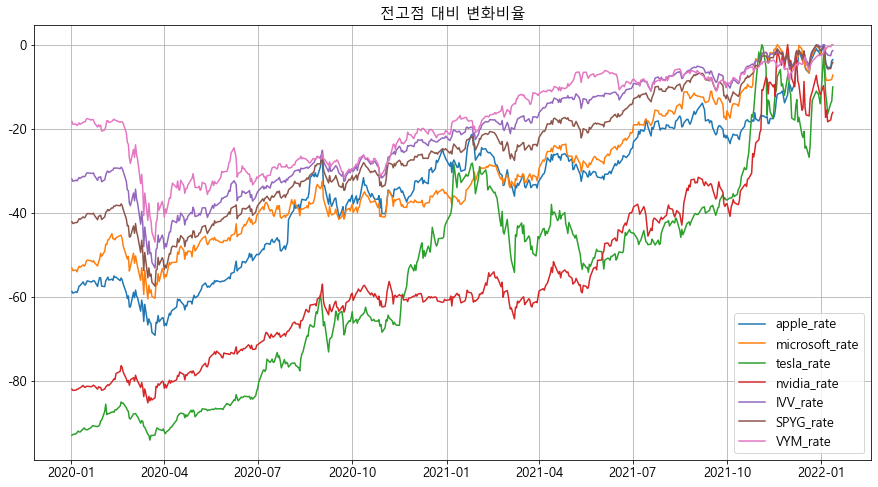

In [19]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('전고점 대비 변화비율', fontdict={'size':15})
for i in range(8,15):
    plt.plot(us_stock_df['index'], us_stock_df.iloc[:,i], label=us_stock_df.columns[i])
plt.legend(fontsize=13)

### 해외 주식 개별 비율 시각화

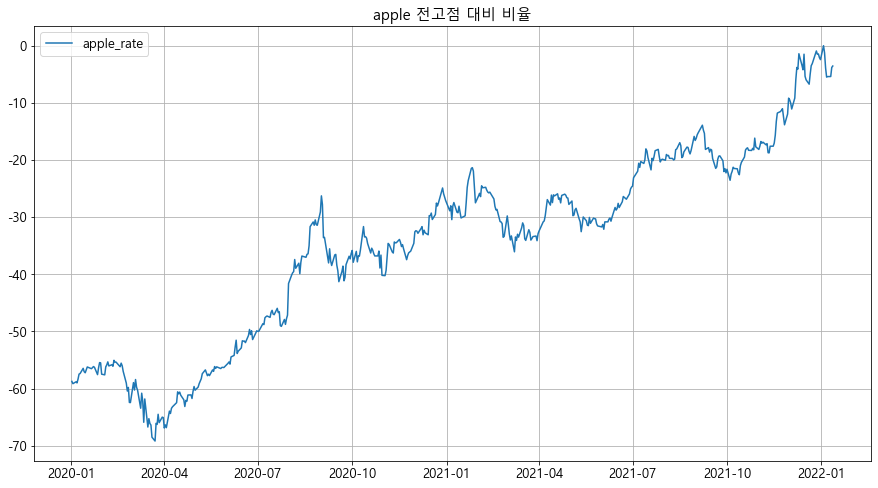

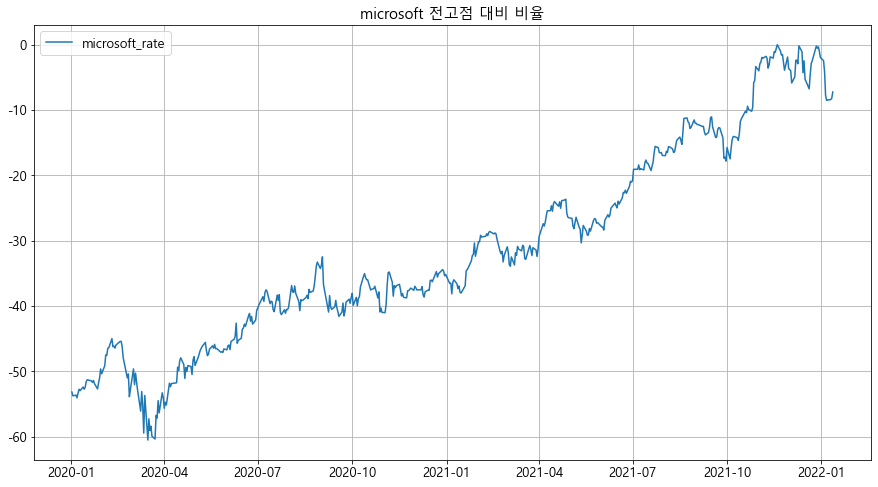

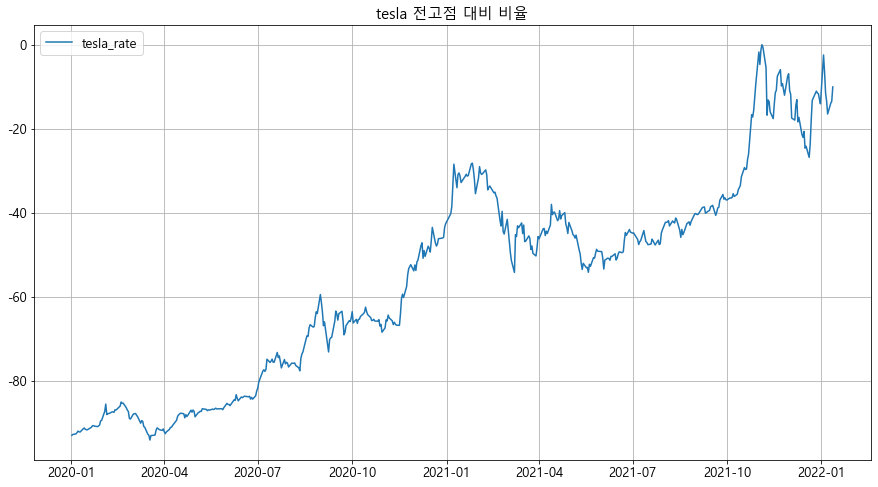

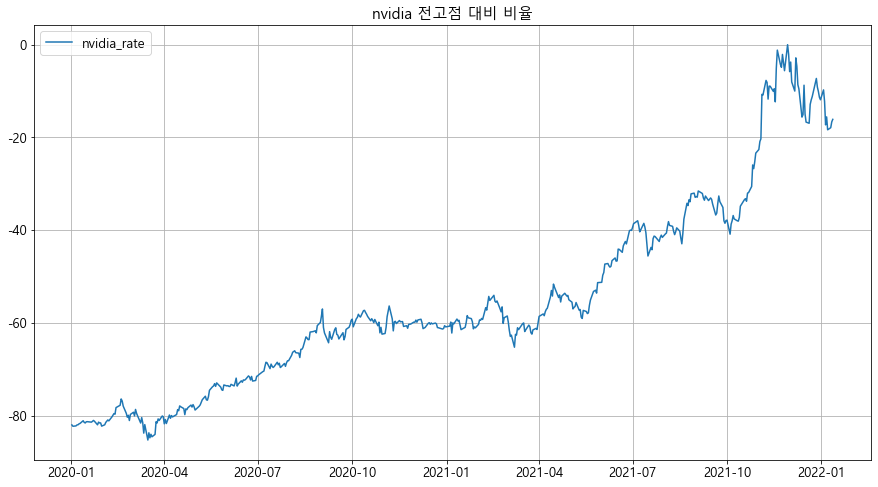

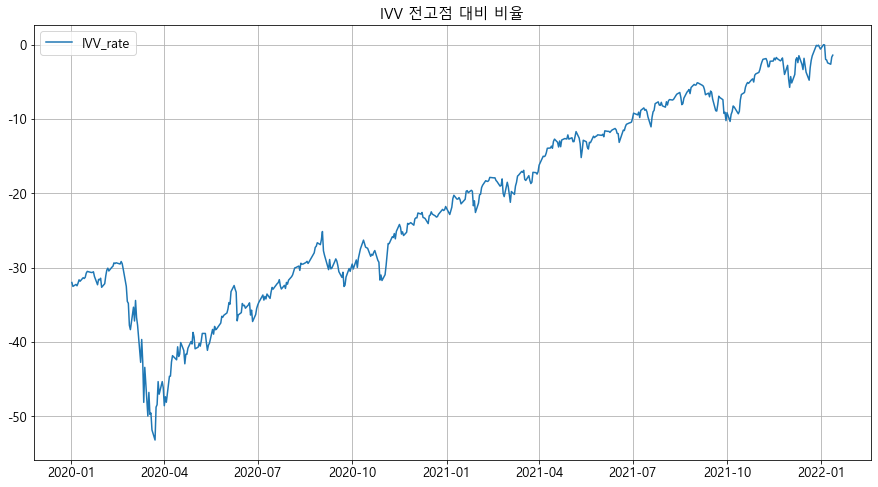

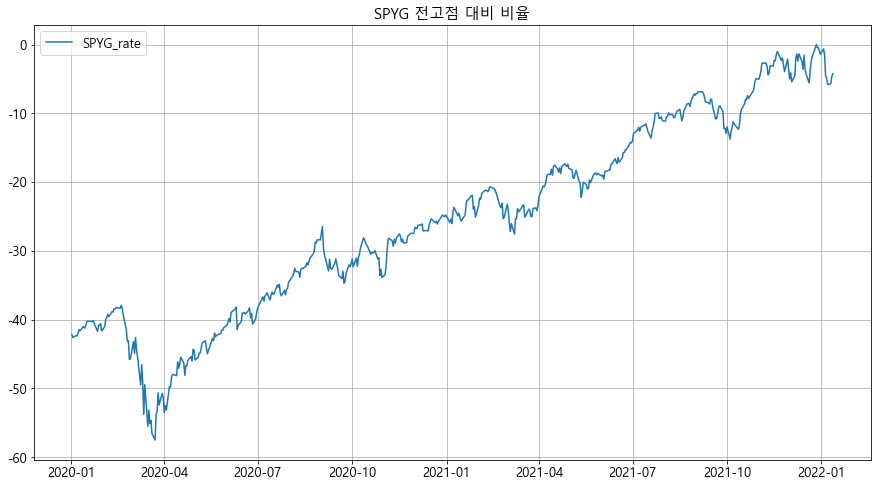

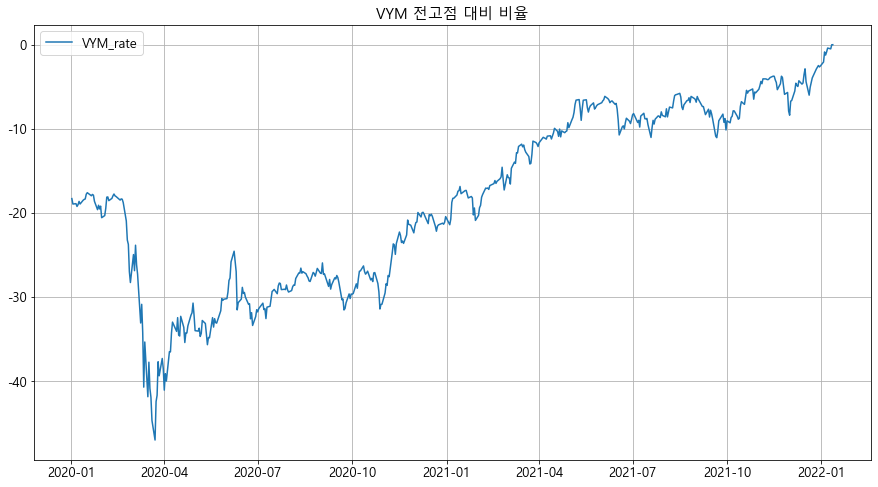

In [20]:
start_index = us_stock_df.shape[1] // 2 + 1
end_index = us_stock_df.shape[1]
for i in range(start_index,end_index):
    plt.figure(figsize=(15,8))
    plt.grid(True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    stock_name = us_stock_df.columns[i][:-5]
    plt.title(f'{stock_name} 전고점 대비 비율', fontdict={'size':15})
    plt.plot(us_stock_df['index'], us_stock_df.iloc[:,i], label=us_stock_df.columns[i])
    plt.legend(fontsize=13)

### 국내 주식 비율 계산

In [21]:
for stock_name in kr_stock_df.columns[1:]:
    top_close = kr_stock_df[stock_name].max()
    col_name = stock_name + '_rate'
    kr_stock_df[col_name] = ( (kr_stock_df[stock_name] - top_close) / top_close ) * 100    

In [22]:
kr_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         504 non-null    datetime64[ns]
 1   셀트리온          504 non-null    int64         
 2   삼성전자          504 non-null    int64         
 3   인선이엔티         504 non-null    int64         
 4   스튜디오드래곤       504 non-null    int64         
 5   KT            504 non-null    int64         
 6   셀트리온_rate     504 non-null    float64       
 7   삼성전자_rate     504 non-null    float64       
 8   인선이엔티_rate    504 non-null    float64       
 9   스튜디오드래곤_rate  504 non-null    float64       
 10  KT_rate       504 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 43.4 KB


### 국내 주식 개별 비율 시각화

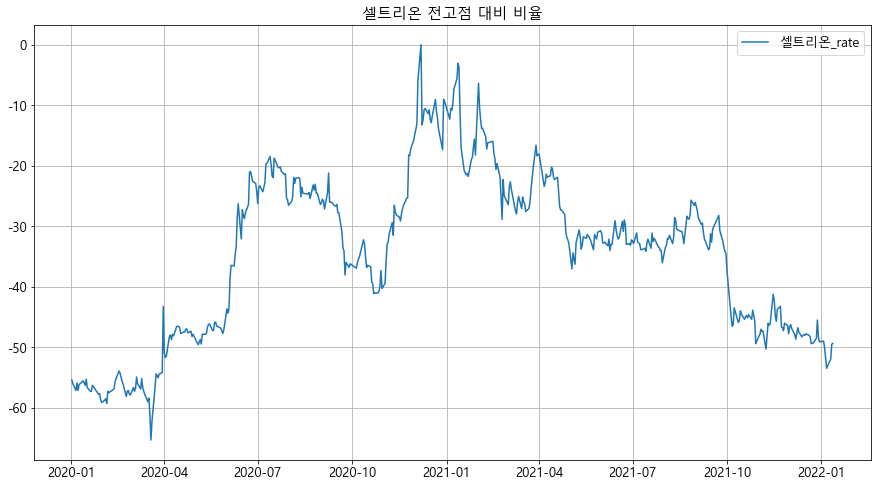

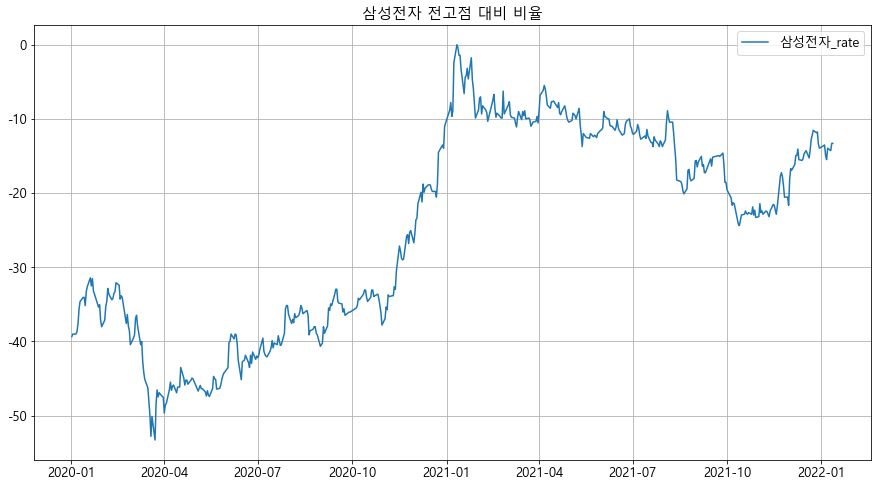

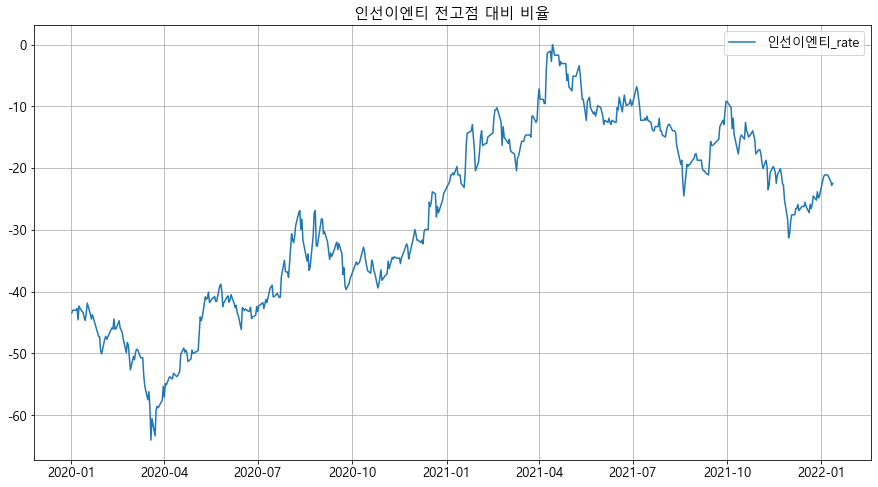

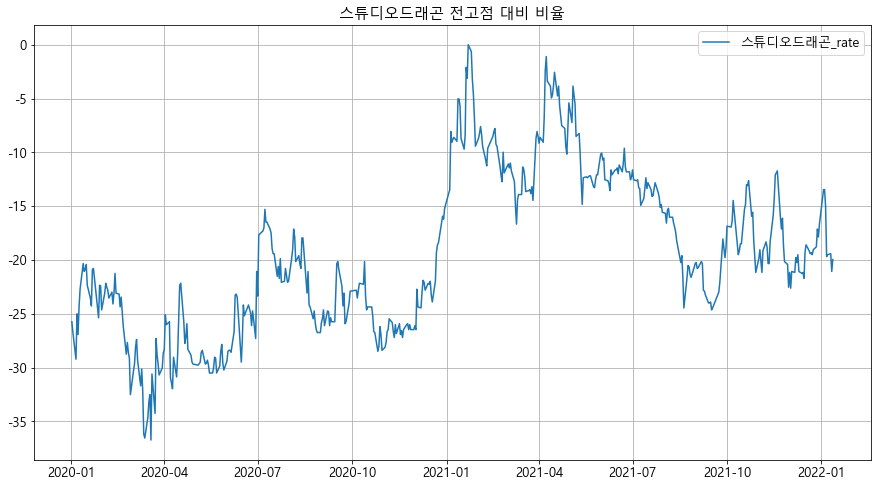

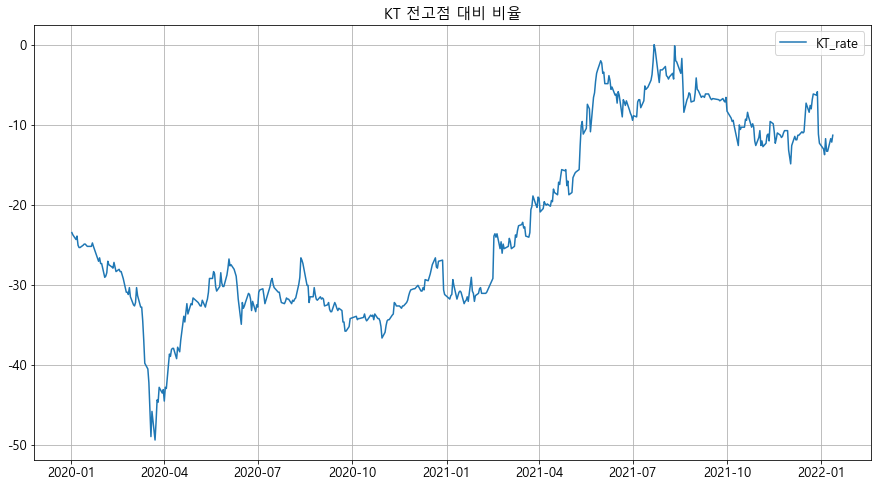

In [23]:
start_index = kr_stock_df.shape[1] // 2 + 1
end_index = kr_stock_df.shape[1]
for i in range(start_index, end_index):
    plt.figure(figsize=(15,8))
    plt.grid(True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    stock_name = kr_stock_df.columns[i][:-5]
    plt.title(f'{stock_name} 전고점 대비 비율', fontdict={'size':15})
    plt.plot(kr_stock_df['index'], kr_stock_df.iloc[:,i], label=kr_stock_df.columns[i])
    plt.legend(fontsize=13)

## 자산 비율 조정
* 1. 소유한 주식의 비중을 계산한다.
* 2. 시각화 한다.